#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


Let's take a look at a sample of the images in the dataset:

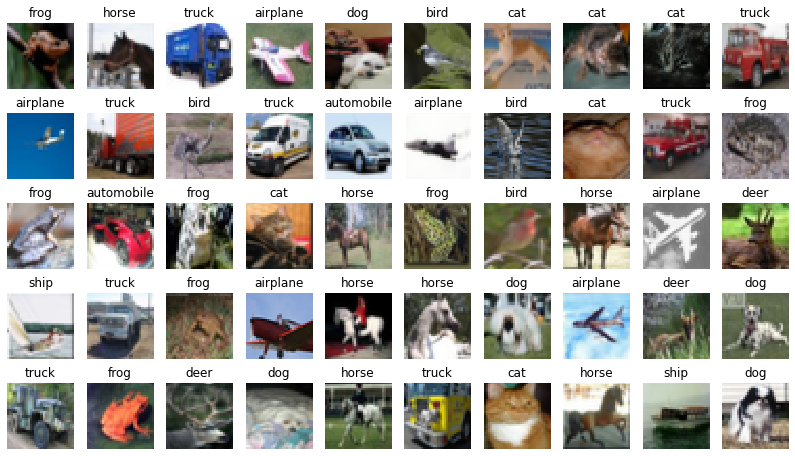

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


X_train_mean = np.mean(X_train, axis= 0)
X_train_std = np.std(X_train, axis=0)

X_train = (X_train - X_train_mean) / X_train_std
X_valid = (X_valid - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 4s 5ms/step - loss: 1.4736 - accuracy: 0.4834 - val_loss: 1.2537 - val_accuracy: 0.5604
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1650 - accuracy: 0.5971 - val_loss: 1.1336 - val_accuracy: 0.6112
Epoch 3/10
352/352 [==============================] - 2s 4ms/step - loss: 1.0448 - accuracy: 0.6415 - val_loss: 1.0936 - val_accuracy: 0.6202
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9703 - accuracy: 0.6684 - val_loss: 1.0495 - val_accuracy: 0.6394
Epoch 5/10
352/352 [==============================] - 2s 7ms/step - loss: 0.9201 - accuracy: 0.6842 - val_loss: 1.0226 - val_accuracy: 0.6472
Epoch 6/10
352/352 [==============================] - 3s 8ms/step - loss: 0.8742 - accuracy: 0.7003 - val_loss: 1.0359 - val_accuracy: 0.6488
Epoch 7/10
352/352 [==============================] - 3s 7ms/step - loss: 0.8441 - accuracy: 0.7090 - val_loss: 1.0330 - val_accuracy: 0.6562
Epoch 

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0284 - accuracy: 0.6565 - 676ms/epoch - 2ms/step
accuracy: 65.65%


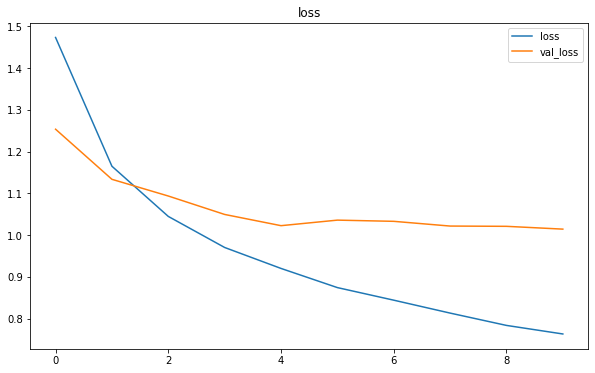

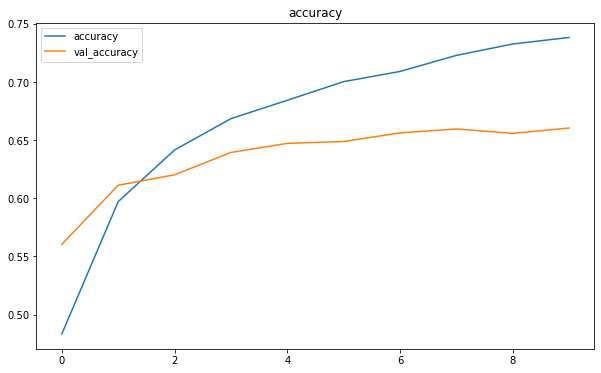

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

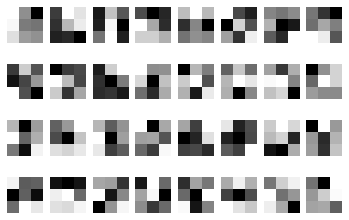

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 10)              

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   In the description of the layers we see that it can be determined by different size and number of kernels, the number of inputs and pooling layers. 
The formula that is used to compute the number of parameters is : 

        **((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters)**
        In the formula, the 1 that is added represent bias term that exists for each filter; moreover, filter indicates the number of filters in the current layer.
2.   Because in the first convolutionary layer we have to introduce the input shape, while this is not the case for the following.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 2s 6ms/step - loss: 1.6018 - accuracy: 0.4310 - val_loss: 1.3563 - val_accuracy: 0.5132
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2851 - accuracy: 0.5489 - val_loss: 1.2133 - val_accuracy: 0.5792
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1790 - accuracy: 0.5923 - val_loss: 1.1540 - val_accuracy: 0.6004
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1110 - accuracy: 0.6149 - val_loss: 1.0933 - val_accuracy: 0.6200
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0570 - accuracy: 0.6343 - val_loss: 1.0564 - val_accuracy: 0.6366
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0191 - accuracy: 0.6480 - val_loss: 1.0160 - val_accuracy: 0.6512
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9916 - accuracy: 0.6562 - val_loss: 1.0172 - val_accuracy: 0.6572
Epoch 

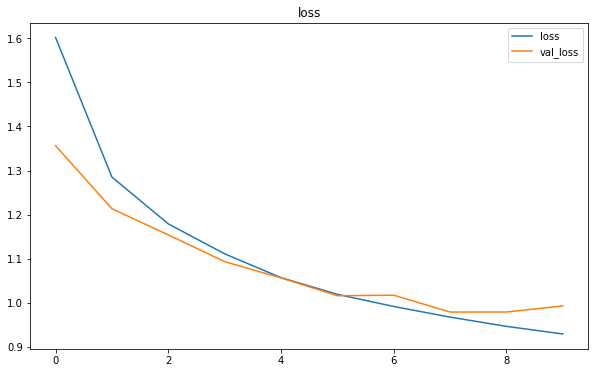

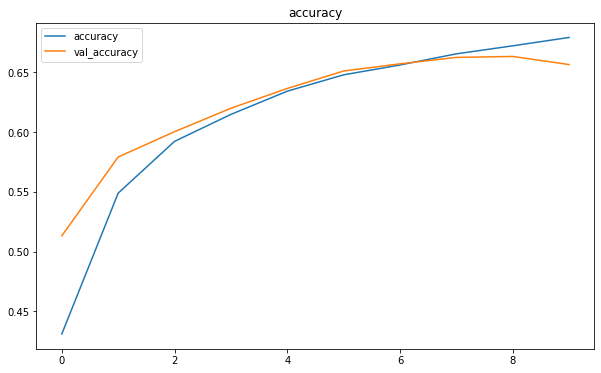

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 dropout_16 (Dropout)        (None, 13, 13, 16)        0         
                                                                 
 flatten_34 (Flatten)        (None, 2704)              0         
                                                                 
 dense_34 (Dense)            (None, 10)                27050     
                                                     

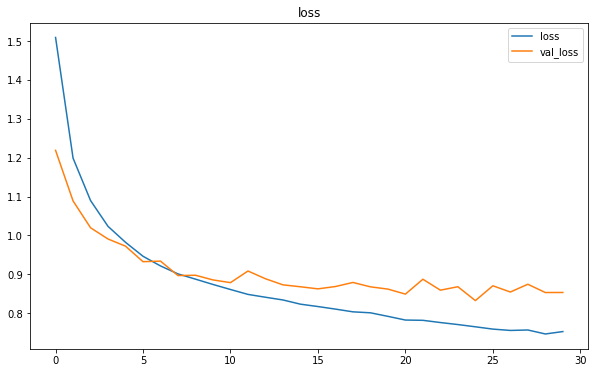

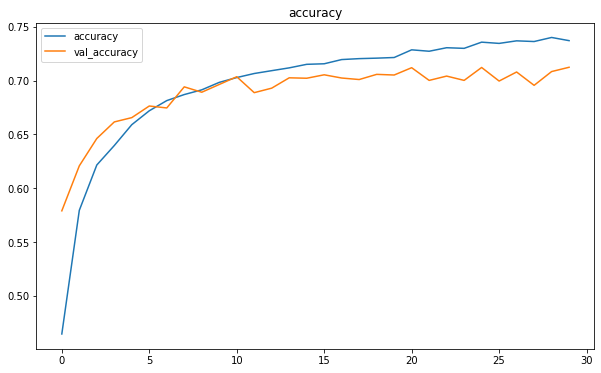

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[3,3], activation='relu'),
    keras.layers.Dropout(0.35),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
  
print(model.summary())

history = model.fit(X_train, y_train, epochs=30, batch_size=100,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found is represented in the cell above. After many attempts and experiments the best model that I found is with an accuracy of a little bit more than 70% on the test set. Even though the accuracy itself is not that high I found that the model performed well in comparison with the previous one with a increasing rate of 5%. All this while keeping a steady loss. 

Discussion:
After testing more than 30 versions I found that the best of my attempts was achieved with raising the epochs by 3 times more, so a total of 30 and lowering the batch size to 100. the filter and kernel size remain more or less the same with the simple model with the exchange of one pool layer with the dropout of 0.35. Bellow I will explain the process of getting to my best result.  

Besides, I tested also other models: 

The first model that I tested was with a higher pool size (3,3). This lead to a big loss and lower accuracy than the original simple model, which means that that direction is not the way to go forward. After this I tried changing the pool size to a lower count(1,1) This seemed to be working better but still not as good as the original count of (2,2) so the decision was to leave it at that. The next stage was edditing the kernel size of the first layer to (3,3) this seemed to be increasing the accuracy while lowering the loss at the same time. Following I started testing with different epochs.. I realized that increasing the epochs by a big amount led to overfiting and specialy with the combination of a big batch size. After trying with epochs from 10 to 150 and batch size of 100, 80 and 50, I found that the best performing model had a batch size of 100 and left it with 10 epochs for the time. 
In the next testing I erased the second pool layer and added the dropout of 0.35. This brought me one of the highes accuracies so far - 0.6869, so I continued with the set parameters and changed the activation only to elu. This lowered the accuracy drasticly and raised the loss. After all this the last test where with the epoch count.. Knowing that a high epoch count leads to overfiting I tested between 10-30 epochs and found that the best performing model is with 30.

Discussion:
1. loss: 1.0777 - accuracy: 0.622
2. loss: 1.0551 - accuracy: 0.6483
3. loss: 0.9903 - accuracy: 0.6561
4. loss: 0.9564 - accuracy: 0.6765
5. loss: 1.0085 - accuracy: 0.6554 
6. loss: 0.456  - accuracy: 0.6512
7. loss: 0.9845 - accuracy: 0.6688
8. loss: 1.0029 - accuracy: 0.6657 
9. loss: 0.9678 - accuracy: 0.6694 
10. loss: 0.9964 - accuracy: 0.6622
11. loss: 0.9035 - accuracy: 0.6869
12. loss: 0.9285 - accuracy: 0.6794 
13. loss: 0.9116 - accuracy: 0.6856
14. loss: 0.9196 - accuracy: 0.6814
15. loss: 1.0754 - accuracy: 0.6221
16. loss: 1.0211 - accuracy: 0.6426
17. loss: 0.9219 - accuracy: 0.6868
18. loss: 0.8890 - accuracy: 0.6963
19. loss: 0.8605 - accuracy: 0.7037
20. loss: 0.8781 - accuracy: 0.7031
21. loss: 0.8639 - accuracy: 0.7064

